# Customer Lifetime Value Prediction

## 1. Business Problem

An Auto Insurance company in the USA is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering Customer Lifetime Value CLV as a parameter for this purpose. Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their ads in more detail, and much more

## 2. Project Overview

* The objective of the problem is to accurately predict the Customer Lifetime Value(CLV) of the customer for an Auto Insurance Company
* Performed EDA to understand the relation of target variable CLV with the other features.
* Statistical Analysis techniques like OLS for numerical and Mann–Whitney U and also Kruskal Wallis test for the categorical variables were performed to find the significance of the features with respect to the target.
* Supervised Regression Models like Linear Regression, Ridge Regression, Lasso Regression, DecisionTree Regression, Random Forest Regression and Adaboost Regression.
* Using GridSearchCV with Random Forest Regression gave the best RMSE and R^2 score values


## 3.Dataset Description
The dataset represents Customer lifetime value of an Auto Insurance Company in the United States, it includes over 24 features and 9134 records to analyze the lifetime value of Customer.


### Import Library

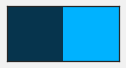

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df=pd.read_csv('../input/marketing-seris-customer-lifetime-value/squark_automotive_CLV_training_data.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 4. Check for missing values
***Check for missing columns and values ​​with `df.info()`***

In [4]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   CLV                            8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

We can see that:
* The dataframe has a total of 9134 rows and 24 columns
* Dataframe has *null* values 
From the information above, we can separate the categorical and numerical columns as follows:

In [6]:
df.dropna(axis=0, how='any', inplace=True)

## 4.1.Numerical Variables

In [7]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [8]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

## 4.2.Categorical variables

In [9]:
cat_cols = df.select_dtypes(include="object")

In [10]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)
cat_cols.drop("Customer",axis=1,inplace=True)

### Statistical summary dengan `df.describe()`

In [11]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000
mean,7981.271398,37843.544265,93.140758,15.071490,48.147549,0.389184,2.963823,431.464401
std,6847.287340,30370.556860,34.381153,10.086656,27.818744,0.914152,2.390357,286.706233
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3974.498315,0.000000,68.000000,6.000000,25.000000,0.000000,1.000000,269.484578
50%,5780.182197,34430.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.167471
75%,8963.294993,62459.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [12]:
cat_cols.describe()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099
unique,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,Oregon,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,2475,6926,4931,2430,5079,4164,5098,4728,6053,3140,3324,3087,4110,5671


In [13]:
for col in cat_cols:
    print(f'''Value count kolom {col}:''')
    print(cat_cols[col].value_counts())
    print()

Value count kolom State:
Oregon        2475
California    2376
Arizona       1640
Nevada         842
Washington     766
Name: State, dtype: int64

Value count kolom Response:
No     6926
Yes    1173
Name: Response, dtype: int64

Value count kolom Coverage:
Basic       4931
Extended    2440
Premium      728
Name: Coverage, dtype: int64

Value count kolom Education:
Bachelor                2430
College                 2369
High School or Below    2339
Master                   648
Doctor                   313
Name: Education, dtype: int64

Value count kolom EmploymentStatus:
Employed         5079
Unemployed       2041
Medical Leave     376
Disabled          357
Retired           246
Name: EmploymentStatus, dtype: int64

Value count kolom Gender:
F    4164
M    3935
Name: Gender, dtype: int64

Value count kolom Location Code:
Suburban    5098
Rural       1598
Urban       1403
Name: Location Code, dtype: int64

Value count kolom Marital Status:
Married     4728
Single      2153
Divorced    

# 5. EDA(Exploratory Data Analysis)

## 1.Numerical Features

### A.Univariate Analysis
After doing a simple analysis of descriptive statistics, now we focus on one by one column with *Univariate Analysis*

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)

#### 1.CLV - Target variable analysis

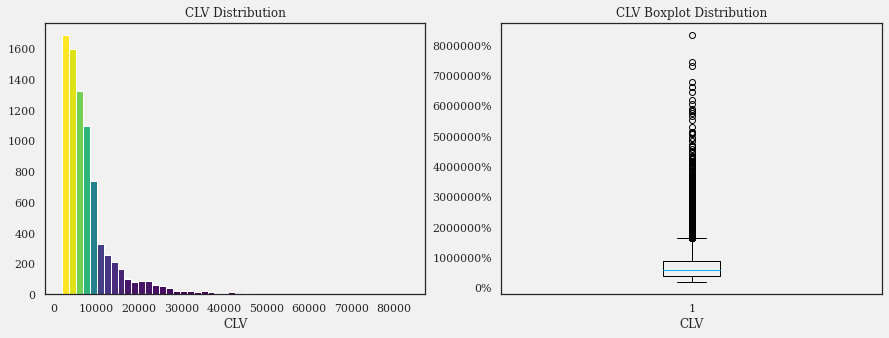

In [15]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['CLV'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['CLV'])
axs[0].set(xlabel='CLV', ylabel='', title='CLV Distribution')
axs[1].set(xlabel='CLV', ylabel='', title='CLV Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [16]:
df["CLV"].skew()

3.0836575056198336

From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

#### 2.Income

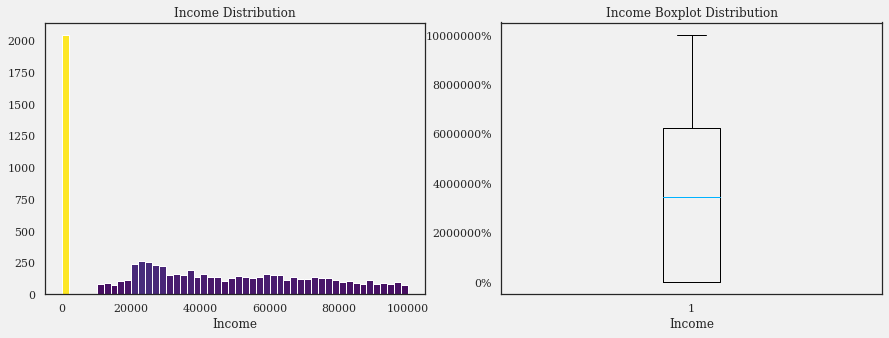

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['Income'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['Income'])
axs[0].set(xlabel='Income', ylabel='', title='Income Distribution')
axs[1].set(xlabel='Income', ylabel='', title='Income Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

#### 3.Monthly Premium Auto

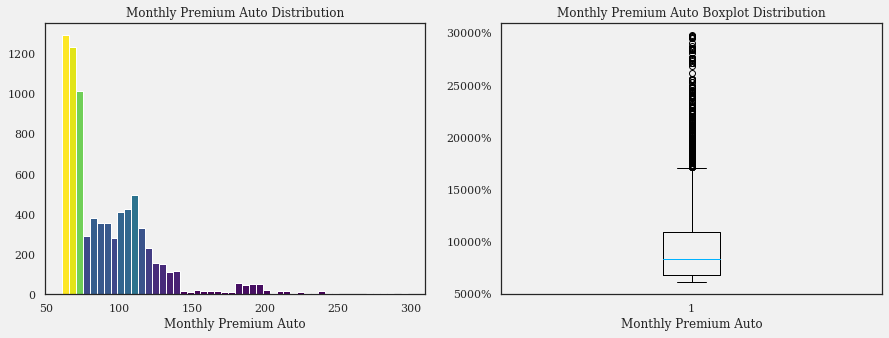

In [18]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df["Monthly Premium Auto"], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df["Monthly Premium Auto"])
axs[0].set(xlabel="Monthly Premium Auto", ylabel='', title='Monthly Premium Auto Distribution')
axs[1].set(xlabel="Monthly Premium Auto", ylabel='', title='Monthly Premium Auto Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

From the distribution and box plot we can infer that Monthly Premium Auto is highly right skewed. There are lot of outliers in our independent variable but we cant treat them directly because they are influential points.

#### 4.Months Since Last Claim

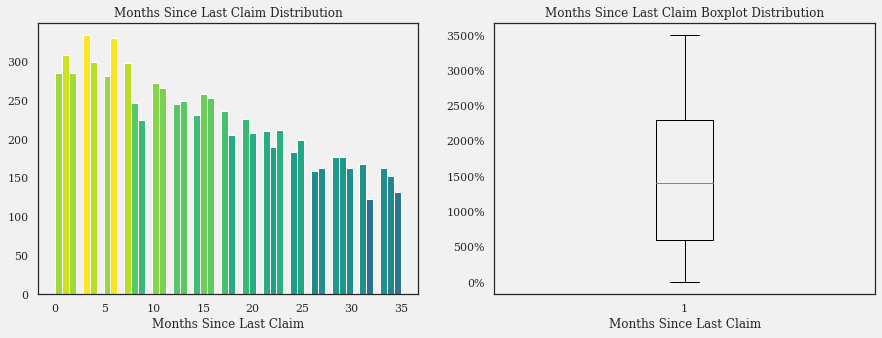

In [19]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['Months Since Last Claim'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['Months Since Last Claim'])
axs[0].set(xlabel='Months Since Last Claim', ylabel='', title='Months Since Last Claim Distribution')
axs[1].set(xlabel='Months Since Last Claim', ylabel='', title='Months Since Last Claim Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

#### 5.Months Since Policy Inception

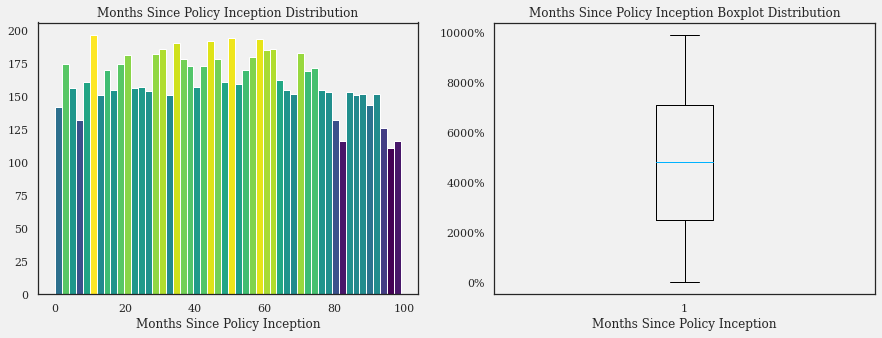

In [20]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['Months Since Policy Inception'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['Months Since Policy Inception'])
axs[0].set(xlabel='Months Since Policy Inception', ylabel='', title='Months Since Policy Inception Distribution')
axs[1].set(xlabel='Months Since Policy Inception', ylabel='', title='Months Since Policy Inception Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

***there seems to be familiarity distribution.***

#### 6.Total claim amount

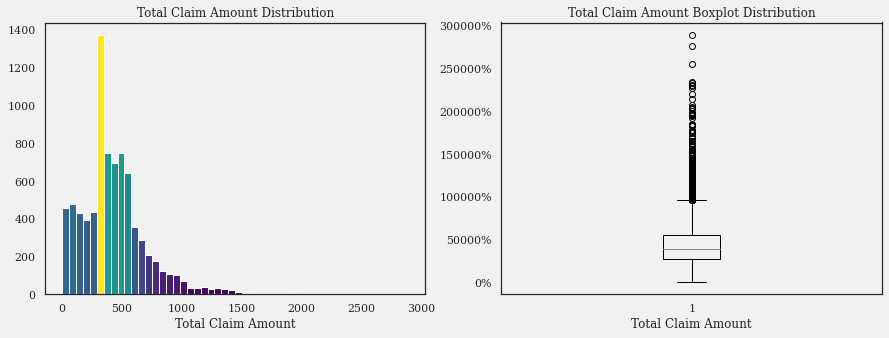

In [21]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['Total Claim Amount'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['Total Claim Amount'])
axs[0].set(xlabel='Total Claim Amount', ylabel='', title='Total Claim Amount Distribution')
axs[1].set(xlabel='Total Claim Amount', ylabel='', title='Total Claim Amount Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

***there seems to be an abnormal distribution, the distribution is skew right, one value looks very high.***
***The Boxplot show there are many outlier.***

## B. Bevariate Analysis

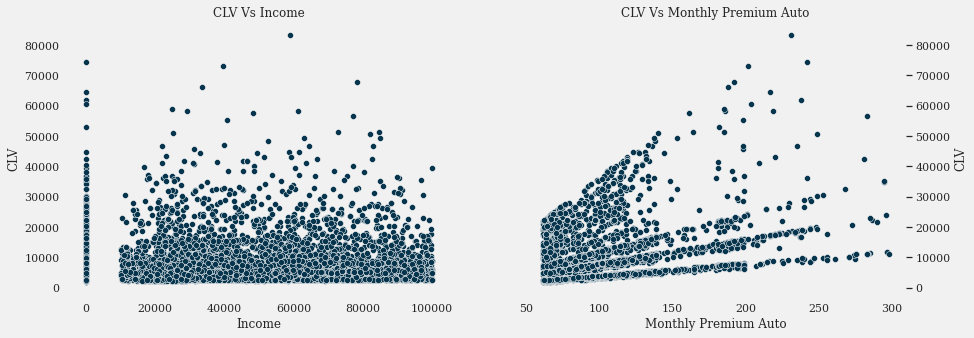

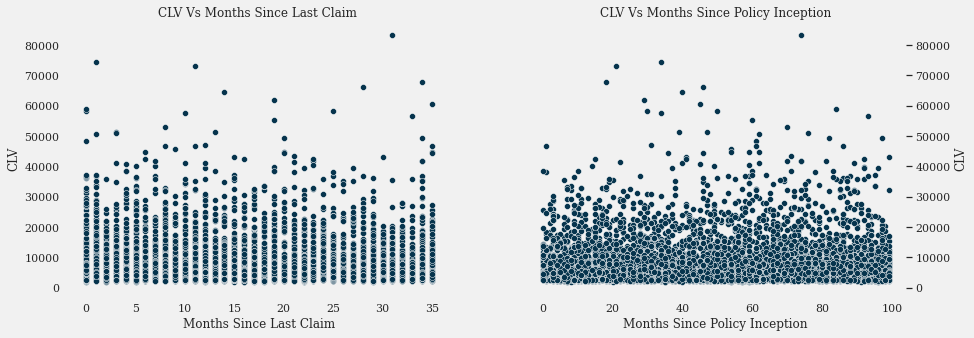

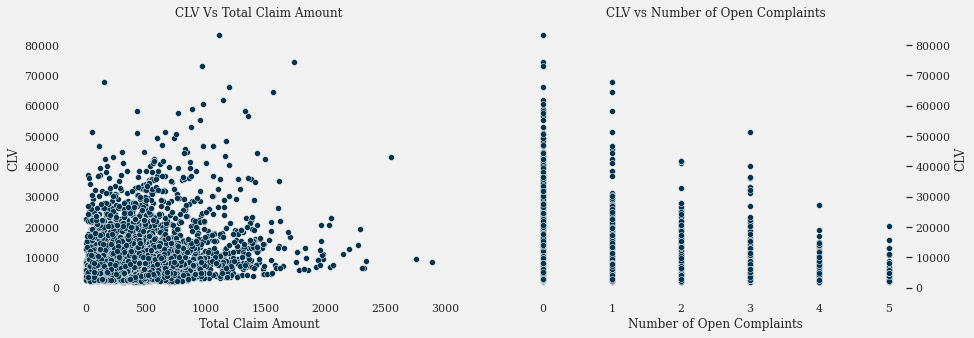

In [22]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x="Income",y='CLV', data=df, ax=axes[0])
sns.scatterplot(x="Monthly Premium Auto",y='CLV', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Income', ylabel='CLV', title='CLV Vs Income')
axes[1].set(xlabel='Monthly Premium Auto', ylabel='CLV', title='CLV Vs Monthly Premium Auto')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x="Months Since Last Claim",y='CLV', data=df, ax=axes[0])
sns.scatterplot(x="Months Since Policy Inception",y='CLV', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Months Since Last Claim', ylabel='CLV', title='CLV Vs Months Since Last Claim ')
axes[1].set(xlabel='Months Since Policy Inception', ylabel='CLV', title='CLV Vs Months Since Policy Inception')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x="Total Claim Amount",y='CLV', data=df, ax=axes[0])
sns.scatterplot(x="Number of Open Complaints",y='CLV', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Total Claim Amount', ylabel='CLV', title='CLV Vs Total Claim Amount')
axes[1].set(xlabel='Number of Open Complaints', ylabel='CLV', title='CLV vs Number of Open Complaints')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()


***Only Total Claim Amount and Monthly Premium Auto appear to have a linear relationship***

## 5.2.Categorical variables

#### 1.State,Response,Coverage,Education,EmploymentStatus,Policy Type

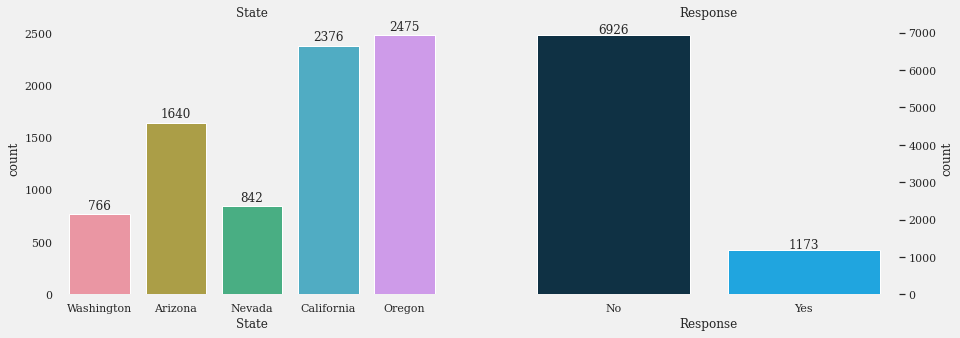

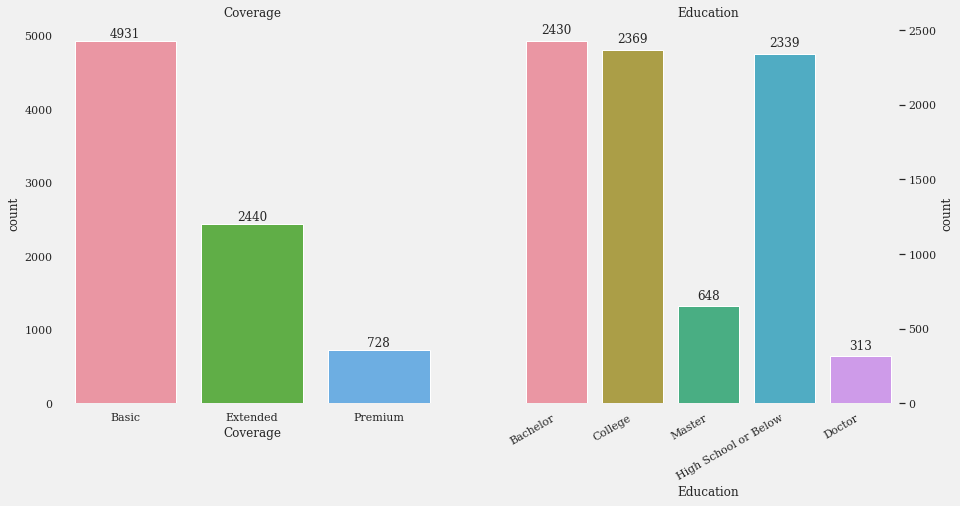

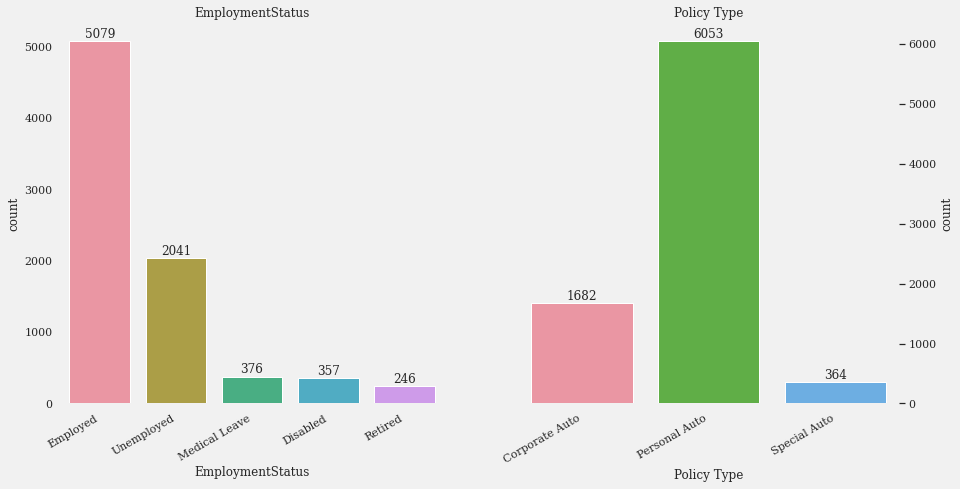

In [23]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df["State"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Response"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='State')
axes[1].set(title='Response')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,7))
p1=sns.countplot(df["Coverage"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Education"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Coverage')
axes[1].set(title='Education')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for label in axes[1].get_xmajorticklabels() + axes[1].get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

f, axes = plt.subplots(1, 2,figsize=(15,7))
p1=sns.countplot(df["EmploymentStatus"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Policy Type"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='EmploymentStatus')
axes[1].set(title='Policy Type')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for label in axes[0].get_xmajorticklabels() + axes[1].get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

* ***The number of customers who do not respond is higher***
* ***Customers are predominantly from California and Aregon***
* ***Basic Coverage, Employed, Personal Auto are the Highest Number***
* ***The number of Bachelor, College, and high school or bellows looks not too much different which is higher than master and doctor***

In [24]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.711446
Unemployed       25.200642
Medical Leave     4.642548
Disabled          4.407952
Retired           3.037412
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed

#### 2. Gender,Location Code,Marital Status,Policy

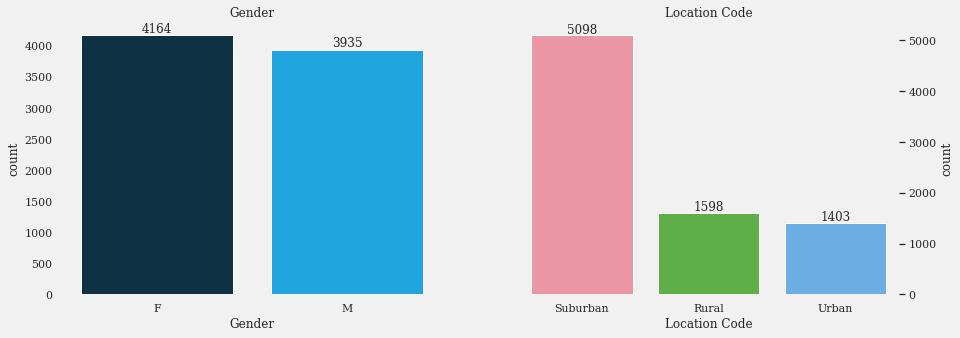

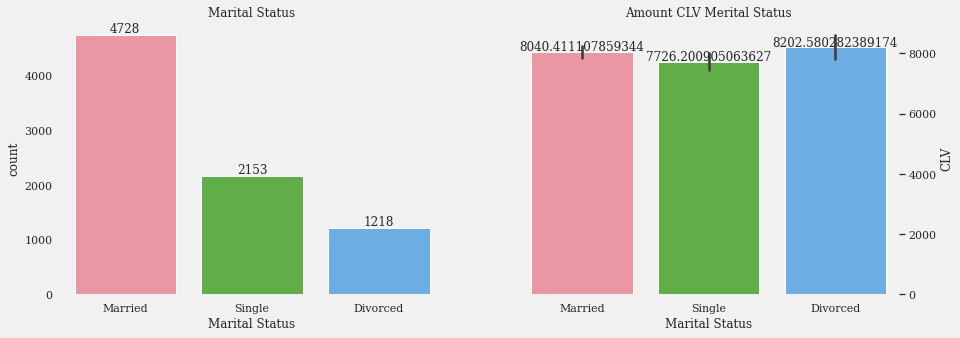

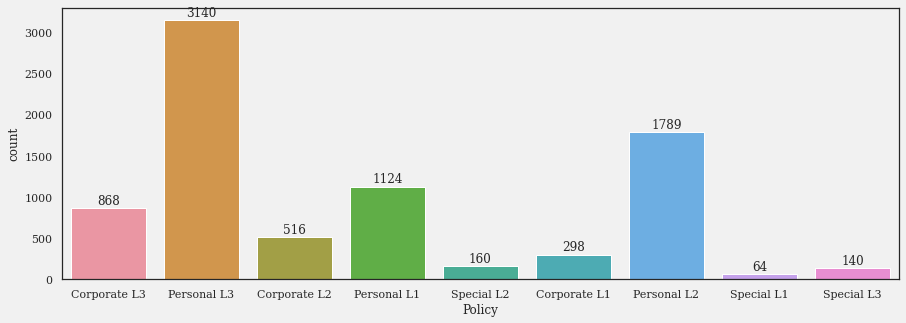

In [25]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df["Gender"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Location Code"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Gender')
axes[1].set(title='Location Code')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df["Marital Status"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.barplot(df["Marital Status"],df["CLV"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Marital Status')
axes[1].set(title='Amount CLV Merital Status')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.figure(figsize=(15,5))
p3=sns.countplot(df["Policy"])
for p in p3.patches:
    height = p.get_height()
    p3.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')



* ***The number of Male and Female looks not too much different and female is the highest values***
* ***The customer's residence is dominated by customers who live in the suburbs and most of them are married***
* ***Amount CLV with maritial status looks not too much different***
* ***Personal L3 policy subcategory has the most number of customers***

#### 3.Renew Offer Type,Sales Channel,Vehicle Class, Number of Complaints, Number of Policies

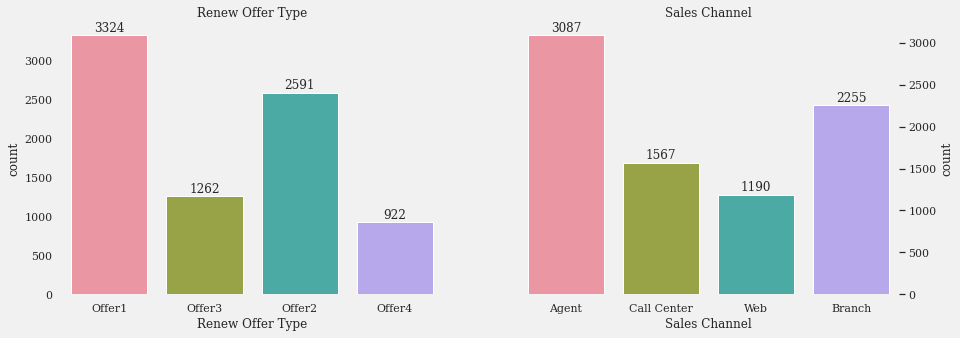

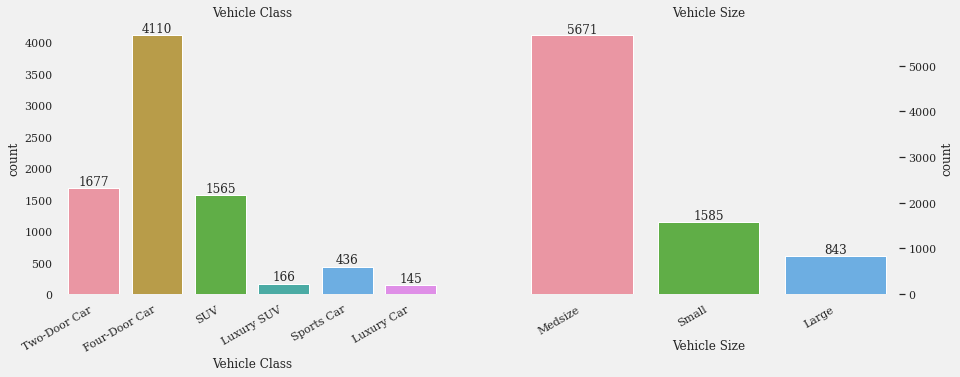

In [26]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df["Renew Offer Type"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Sales Channel"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Renew Offer Type')
axes[1].set(title='Sales Channel')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,5))
p3=sns.countplot(df["Vehicle Class"], ax=axes[0])
for p in p3.patches:
    height = p.get_height()
    p3.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p4=sns.countplot(df["Vehicle Size"], ax=axes[1])
for p in p4.patches:
    height = p.get_height()
    p4.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Vehicle Class')
axes[1].set(title='Vehicle Size')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for label in axes[0].get_xmajorticklabels() + axes[1].get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

* ***the first and second offers are more attractive to customers and agents are the highest sales channels***
* ***it turns out that the vehicle Class with four car doors is the highest number with medium size***

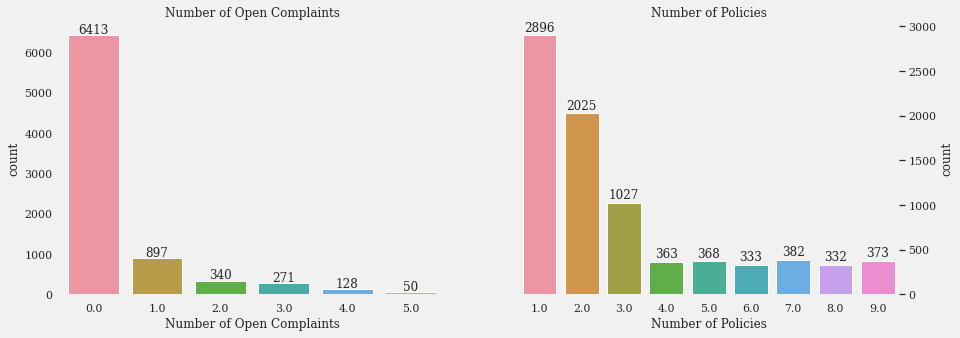

In [27]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df["Number of Open Complaints"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Number of Policies"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Number of Open Complaints')
axes[1].set(title='Number of Policies')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

***Category No 0 are the highest Number of Open Complaints and Category No 1 are the highest Number of Policies***

#### 4.Months

In [28]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [29]:
df["Months"] = df["Effective To Date"].dt.month
df['Months'] = df['Months'].astype('object')

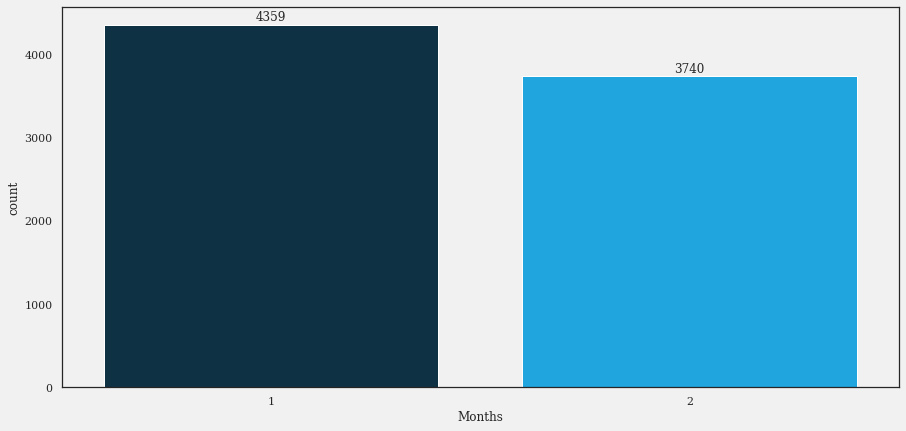

In [30]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=df['Months'], data=df);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')

***January and February is the highest the date that an agreement or transaction between or among customer and An Auto Insurance company***

## 6. HeatMap

In [31]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

<AxesSubplot:>

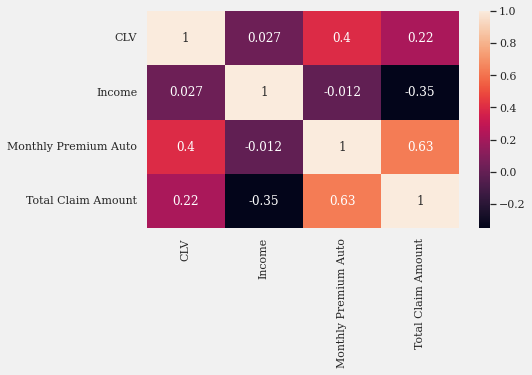

In [32]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.


## 7. Statistical Significance

- H0:The null hypothesis of the test is the data is normally distributed
- HA:The data is not normally distributed

In [33]:
import scipy.stats as stats
stats.shapiro(df['CLV'])

ShapiroResult(statistic=0.7024554014205933, pvalue=0.0)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

We will proceed with non parametric tests since the dependent variable is not normally distributed

In [34]:
columns_cat = list(cat_cols.columns)
columns_cat

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [35]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
TTest: ['Response', 'Gender']


* H0: the distributions of both populations are equal
* Ha: that the distributions are not equal.    

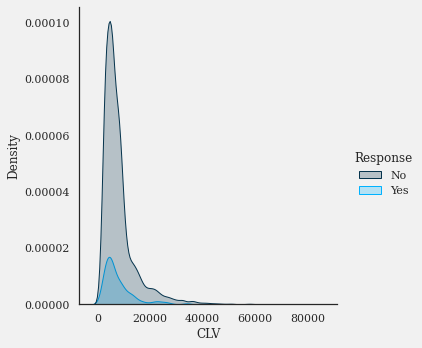

In [36]:
sns.displot(df, x="CLV", hue="Response", kind="kde", fill=True)

***Customer with No Response are Higher than Yes Response***

If the distributions are identical, which is the null hypothesis of the Mann-Whitney U test, the mean rank will be the same

In [37]:
yes=df[df['Response']=='No']['CLV']
no=df[df['Response']=='Yes']['CLV']

In [38]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=4131651.0, pvalue=0.34762108087923294)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

In [39]:
male=df[df['Gender']=='M']['CLV']
female=df[df['Gender']=='F']['CLV']

In [40]:
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=8079425.0, pvalue=0.28156688795119056)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

- H0:the mean ranks of the groups are the same.
- H1:the mean ranks of the groups are not the same.

In [41]:
ca=df[df['State']=='California']['CLV']
Or=df[df['State']=='Oregon']['CLV']
Ar=df[df['State']=='Arizona']['CLV']
Ne=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']

In [42]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=7.000762654966366, pvalue=0.13584792806602403)


p-value > 0.05 failed to reject H0

In [43]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

MannwhitneyuResult(statistic=8079425.0, pvalue=0.28156688795119056)


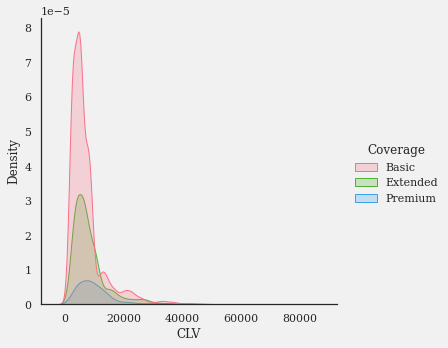

In [44]:
sns.displot(df, x="CLV", hue="Coverage", kind="kde", fill=True)

In [45]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

In [46]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=440.92672263107187, pvalue=1.7946456839381562e-96)


In [47]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=114.3389466890186, pvalue=1.0754531606863518e-49)

In [48]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']

In [49]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=11.16126879182479, pvalue=0.024810129975179118)


<Figure size 936x360 with 0 Axes>

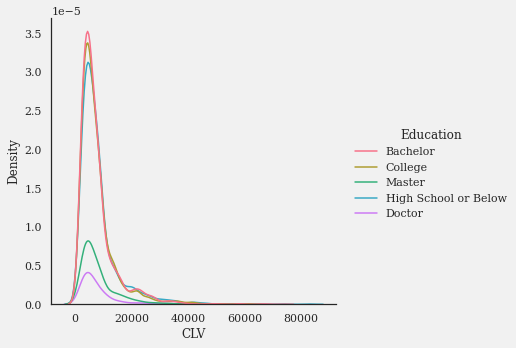

In [50]:
plt.figure(figsize=(13,5))
sns.displot(df, x="CLV", hue="Education", kind="kde", fill=False)

In [52]:
# use LabelEncoder() to encode other categorical columns:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    le.fit(cat_cols[col])
    cat_cols[col] = le.transform(cat_cols[col])
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [55]:
dfn = pd.concat([numerical_cols,cat_cols],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,4,0,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,0,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,2,0,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,1,0,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,4,0,...,1,1,0,2,1,3,0,0,0,1


In [56]:
import statsmodels.api as sm

In [57]:
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     76.95
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          9.25e-300
Time:                        15:34:10   Log-Likelihood:                -82280.
No. Observations:                8099   AIC:                         1.646e+05
Df Residuals:                    8077   BIC:                         1.648e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           545.5365    500.703      1.090      0.276    -435.971    1527.044
Income                            0.0010      0.003      0.283      0.777      -0.006       0.008
Monthly Premium Auto             84.7045      3.071     27.579      0.000      78.684      90.725
Months Since Last Claim           7.7142      6.914      1.116      0.265      -5.839      21.267
Months Since Policy Inception    -0.7782      2.518     -0.309      0.757      -5.715       4.158
Number of Open Complaints      -243.9303     76.229     -3.200      0.001    -393.358     -94.503
Number of Policies               66.9196     29.262      2.287      0.022       9.560     124.280
Total Claim Amount               -0.9981      0.386     -2.587      0.010      -1.754      -0.242
State                            27.1154     52.695      0.515      0.607     -76.180     130.411
Response                       -449.3566    202.619     -2.218      0.027    -846.541     -52.172
Coverage                       -215.2938    120.089     -1.793      0.073    -450.700      20.112
Education                       115.0327     50.610      2.273      0.023      15.824     214.242
EmploymentStatus               -129.4134     77.977     -1.660      0.097    -282.269      23.442
Gender                         -153.6983    140.178     -1.096      0.273    -428.483     121.086
Location Code                    98.2393    123.089      0.798      0.425    -143.046     339.524
Marital Status                 -155.8347    117.226     -1.329      0.184    -385.627      73.958
Policy Type                     478.3025    306.612      1.560      0.119    -122.736    1079.341
Policy                          -34.2440     90.806     -0.377      0.706    -212.247     143.759
Renew Offer Type               -374.3845     72.187     -5.186      0.000    -515.889    -232.880
Sales Channel                    -5.6007     65.656     -0.085      0.932    -134.304     123.103
Vehicle Class                    44.6438     34.246      1.304      0.192     -22.486     111.774
Vehicle Size                     95.2278    129.920      0.733      0.464    -159.448     349.904
==============================================================================
Omnibus:                     5093.557   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60998.563
Skew:                           2.883   Prob(JB):                         0.00
Kurtosis:                      15.145   Cond. No.                     3.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+05. This might ind

## 8. Assumptions
1. No autocorrelation
2. Linearity of residuals
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity

**Assumption 1 No Auto correlation.**

Test needed : Durbin- Watson Test.

It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
If the value ranges from 2-4, it is known as Negative autocorrelation.
If the value is exactly 2, it means No Autocorrelation.
For a good linear model, it should have low or no autocorrelation.
we can see here the values of dublin watson test: 1.995 (No AUTO-CORRELATION)

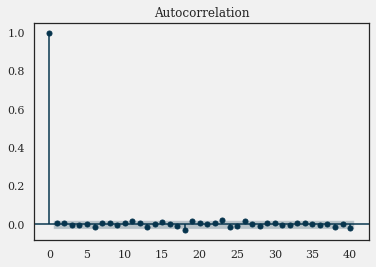

In [58]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

From the graph above, we can easily see that there is no autocorrelation.

***Assumption 2- Normality of Residuals***

The second assumption is the Normality of Residuals / Error terms.
For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [59]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=60998.56336035541, pvalue=0.0)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected.
In this case the computed value of the JB statistic 65051.11 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

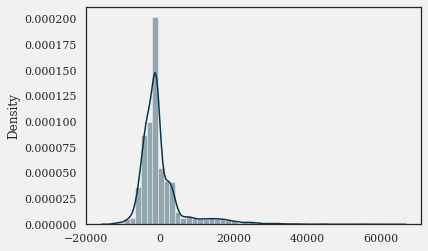

In [60]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed

**Asssumption 3 - Linearity of residuals**

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one.

In [62]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(1.0889408168171846, 0.003398363439226757)

H0:The data is linear, pvalue > 0.05 failed to reject H0, here we failed to reject H0 so residuals are normally distributed

In [63]:
lin_reg.resid.mean()

1.5156904950101816e-09

***Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)***

Homoscedacity :: If the variance of the residuals are symetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:

𝐻0: 𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎

𝐻𝑎: 𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎
The residuals should be homoscedastic.

Goldfeld Test

In [64]:
import statsmodels.stats.api as sms

In [65]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(1.2139706321388843, 3.937606217386934e-10, 'increasing')

 p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

**Assumption 5- NO MULTI COLLINEARITY**

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,2.262564
Monthly Premium Auto,2.305247
Months Since Last Claim,1.005429
Months Since Policy Inception,1.014665
Number of Open Complaints,1.003895
Number of Policies,1.011425
Total Claim Amount,2.529873
State,1.002308
Response,1.051344
Coverage,1.280426


we can see that there is high VIF in column Policy & policy type
Also we have seen in statistical approach these veriables are not significant to predict target
hence from above 2 conclusion we can remove them

In [68]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type','Policy', 'Income'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [69]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5669, 18)
(5669,)
(2430, 18)
(2430,)


# 9.Model Building

## 9.1.Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.25201819812776693
R^2 score for test: 0.24695744248763352


In [72]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [74]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.5734882875798778
MAE 0.44456205586735337
R-squared: 0.24695744248763352


In [75]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Renew Offer Type', 'Vehicle Class']


In [76]:
X_new = X[['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'Response', 'EmploymentStatus', 'Renew Offer Type']]

In [77]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     381.7
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:36:35   Log-Likelihood:                -6878.5
No. Observations:                8099   AIC:                         1.377e+04
Df Residuals:                    8091   BIC:                         1.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         7.9076      0.025    320.424      0.000       7.859       7.956
Monthly Premium Auto          0.0089      0.000     36.344      0.000       0.008       0.009
Number of Open Complaints    -0.0295      0.007     -4.278      0.000      -0.043      -0.016
Number of Policies            0.0540      0.003     20.421      0.000       0.049       0.059
Total Claim Amount           -0.0001    3.1e-05     -3.402      0.001      -0.000   -4.47e-05
Response                     -0.0381      0.018     -2.102      0.036      -0.074      -0.003
EmploymentStatus             -0.0246      0.005     -4.756      0.000      -0.035      -0.014
Renew Offer Type             -0.0436      0.006     -6.800      0.000      -0.056      -0.031
==============================================================================
Omnibus:                     1290.608   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1993.315
Skew:                           1.151   Prob(JB):                         0.00
Kurtosis:                       3.779   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 9.2.Rigde and Lasso Regression

In [78]:
from sklearn.linear_model import Ridge, Lasso

In [79]:
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5754307317104841
R-squared: 0.24184758991270838


In [80]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Lasso Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Lasso Regression
RMSE: 0.5930885877926103
R-squared: 0.19460384833639066


## 9.3.Decision Tree

In [81]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.27388199198423374
MAE 0.11243323597938089
R-squared: 0.8282497526936339


In [82]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type','Policy', 'Income'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

## 9.4.RandomForest 

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.1943024076483477
MAE 0.09196160386399611
R-squared: 0.9135576073132814


## Hyperparameter tuning of random forest

In [85]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 200}

In [86]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.19587718058835132
MAE 0.09288452578667496
R-squared: 0.9121507407600086


In [87]:
from sklearn.ensemble import AdaBoostRegressor

In [88]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [89]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.21551328253904226
MAE 0.13046828361377752
R-squared: 0.8936546514734769


In [90]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.676163
Monthly Premium Auto,0.229629
Total Claim Amount,0.015913
Months Since Policy Inception,0.014093
Months Since Last Claim,0.013808
EmploymentStatus,0.008022
Education,0.006070
State,0.004875
Coverage,0.004262
Renew Offer Type,0.004230


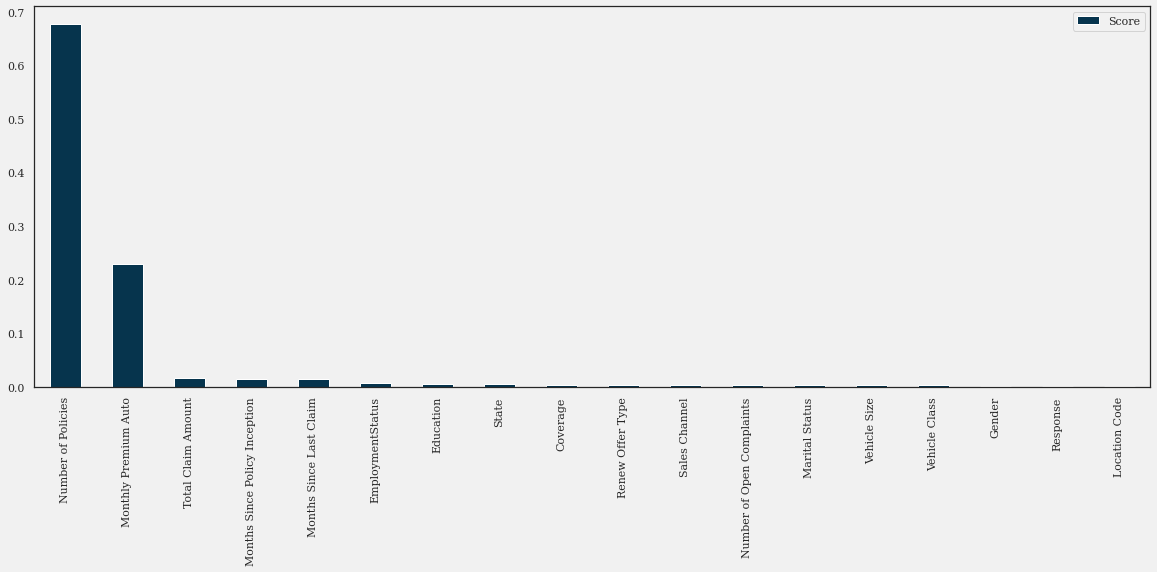

In [91]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score

Number of Policies and Monthly Premium Auto are the most important features in predicting CLV

# 10. Final Model

By comparing RMSE and R^2 score results of models and then we choose the best model as the Random Forest ***without*** GridSearchCV, having the best evaluation scores.


# 11. Conclusion

* Overall we can see that No of policies, Monthly Premium auto, Total Claim amount, Months Since Policy Inception, Income , Months Since Last Claim, Number of Open Complaints, Coverage_Extended,vEmploymentStatus_Employed and Renew Offer Type_Offer2 are the important features in predicting the Customer Lifetime Value.
* The customers having more number of policies with high monthly premium will add more value to company.
* Ironically being an auto insurance company, the type of vehicle or size does not have an impact on the CLV prediction.
* The insurance agents should start increasing their policy advertisement for the customers who have more no. of policies, which is the major feature in predicting the CLV.


***Thanks for the review. if there are corrections and suggestions, don't hesitate to comment below.***